In [37]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.utils import plot_model, load_img, img_to_array

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

import cv2                  
import numpy as np  
from tqdm import tqdm
import os                  

In [3]:
#pokemon_names = ["Abra", "Aerodactyl", "Alakazam", "Arbok", "Arcanine", "Articuno", "Beedrill", "Bellsprout", "Blastoise", "Bulbasaur", "Butterfree", "Caterpie", "Chansey", "Charizard", "Charmander", "Charmeleon", "Clefable", "Clefairy", "Cloyster", "Cubone", "Dewgong", "Diglett", "Ditto", "Dodrio", "Doduo", "Dragonair", "Dragonite", "Dratini", "Drowzee", "Dugtrio", "Eevee", "Ekans", "Electabuzz", "Electrode", "Exeggcute", "Exeggutor", "Farfetchd", "Fearow", "Flareon", "Gastly", "Gengar", "Geodude", "Gloom", "Golbat", "Goldeen", "Golduck", "Golem", "Graveler", "Grimer", "Growlithe", "Gyarados", "Haunter", "Hitmonchan", "Hitmonlee", "Horsea", "Hypno", "Ivysaur", "Jigglypuff", "Jolteon", "Jynx", "Kabuto", "Kabutops", "Kadabra", "Kakuna", "Kangaskhan", "Kingler", "Koffing", "Krabby", "Lapras", "Lickitung", "Machamp", "Machoke", "Machop", "Magikarp", "Magmar", "Magnemite", "Magneton", "Mankey", "Marowak", "Meowth", "Metapod", "Mew", "Mewtwo", "Moltres", "Mr.Mime", "Muk", "Nidoking", "Nidoqueen", "Nidoran-f", "Nidoran-m", "Nidorina", "Nidorino", "Ninetales", "Oddish", "Omanyte", "Omastar", "Onix", "Paras", "Parasect", "Persian", "Pidgeot", "Pidgeotto", "Pidgey", "Pikachu", "Pinsir", "Poliwag", "Poliwhirl", "Poliwrath", "Ponyta", "Porygon", "Primeape", "Psyduck", "Raichu", "Rapidash", "Raticate", "Rattata", "Rhydon", "Rhyhorn", "Sandshrew", "Sandslash", "Scyther", "Seadra", "Seaking", "Seel", "Shellder", "Slowbro", "Slowpoke", "Snorlax", "Spearow", "Squirtle", "Starmie", "Staryu", "Tangela", "Tauros", "Tentacool", "Tentacruel", "Vaporeon", "Venomoth", "Venonat", "Venusaur", "Victreebel", "Vileplume", "Voltorb", "Vulpix", "Wartortle", "Weedle", "Weepinbell", "Weezing", "Wigglytuff", "Zapdos", "Zubat"]

pokemon_names = ["Pikachu","Bulbasaur", "Ivysaur", "Venusaur", "Charmander", "Charmeleon", "Charizard", "Squirtle", "Wartortle", "Blastoise", "Articuno", "Zapdos", "Moltres", "Mew", "Mewtwo"]

In [38]:
#listas vacías para la matriz de imágenes y sus etiquetas
X = []
Z = []
img_size = 224

In [39]:
#funcion para generar un dataset de imagenes usable a partir de un directorio con directorios de imagenes
def make_train_data(poke_name, DIR):
  for img in tqdm(os.listdir(DIR)):
    label = poke_name
    path = os.path.join(DIR, img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (img_size, img_size))
    X.append(np.array(img))
    Z.append(str(label))

In [40]:
i = 1
#para cada pokemon en la lista se hace llamado a la funcion
for pokemon in pokemon_names:
  dir = './PokemonData/' + pokemon
  make_train_data(pokemon, dir)
  print(i , ' :' , len(X))
  i = i + 1

100%|██████████| 103/103 [00:01<00:00, 65.96it/s]


1  : 103


100%|██████████| 50/50 [00:00<00:00, 88.88it/s]


2  : 153


100%|██████████| 88/88 [00:01<00:00, 83.10it/s]


3  : 241


100%|██████████| 52/52 [00:00<00:00, 65.63it/s]


4  : 293


100%|██████████| 111/111 [00:02<00:00, 45.65it/s]


5  : 404


100%|██████████| 44/44 [00:00<00:00, 72.90it/s]


6  : 448


100%|██████████| 88/88 [00:01<00:00, 52.74it/s]


7  : 536


100%|██████████| 59/59 [00:00<00:00, 80.64it/s]


8  : 595


100%|██████████| 85/85 [00:00<00:00, 87.93it/s]


9  : 680


100%|██████████| 57/57 [00:01<00:00, 49.15it/s]


10  : 737


100%|██████████| 79/79 [00:01<00:00, 63.08it/s]


11  : 816


100%|██████████| 86/86 [00:02<00:00, 40.04it/s]


12  : 902


100%|██████████| 82/82 [00:01<00:00, 50.64it/s]


13  : 984


100%|██████████| 71/71 [00:01<00:00, 54.68it/s]


14  : 1055


100%|██████████| 99/99 [00:01<00:00, 90.84it/s] 

15  : 1154


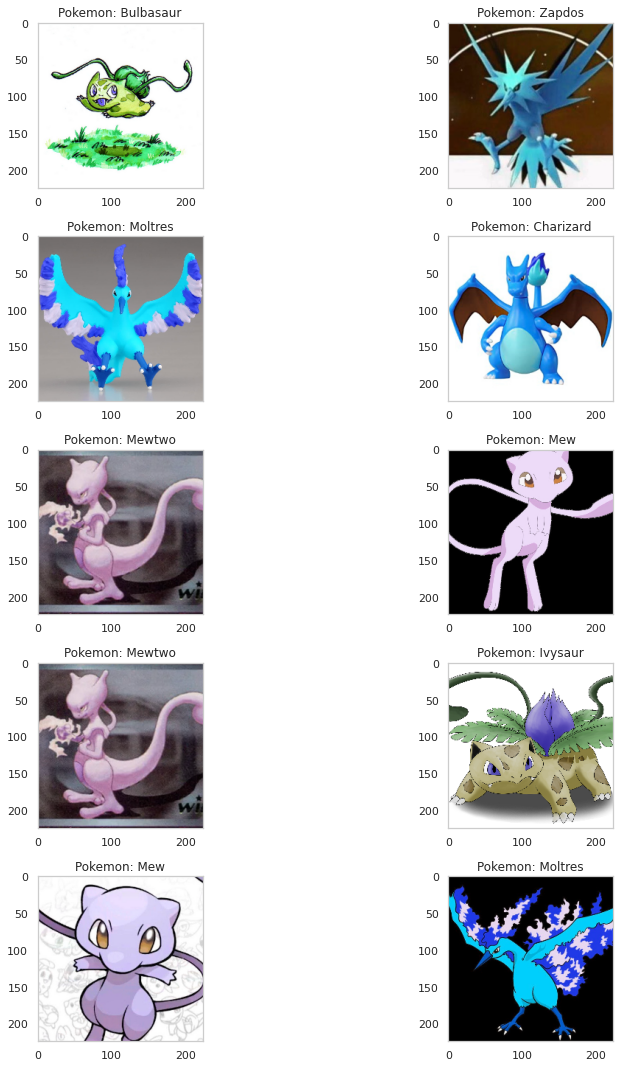

In [41]:
#demostracion grafica del dataset
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Pokemon: '+Z[l])
        ax[i,j].grid(None)
plt.tight_layout()

In [42]:
#label encoding para las etiquetas
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,15)
#transformacion de los valores de las imagenes a escala 0 - 1
X=np.array(X)
X=X/255

In [43]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42) #split del dataset en train y test

In [44]:
#tamaño de los batches y epocas a emplear
batch_size=128
epochs=15

In [45]:
K.clear_session()
#Modelo de red neuronal convolutiva

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(15, activation = "softmax"))

In [46]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

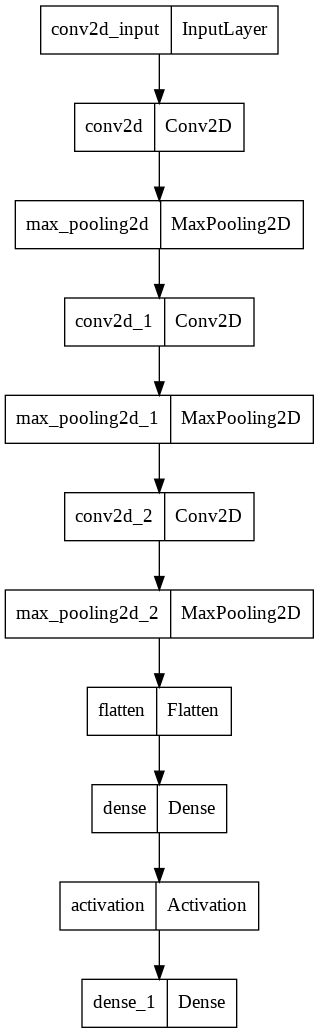

In [14]:
plot_model(model,"model_I.png")

In [15]:
History = model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/15
8/8 [==============================] - 79s 10s/step - loss: 6.8824 - accuracy: 0.1257 - val_loss: 2.6560 - val_accuracy: 0.1429
Epoch 2/15
8/8 [==============================] - 74s 9s/step - loss: 2.5143 - accuracy: 0.1961 - val_loss: 2.2759 - val_accuracy: 0.3506
Epoch 3/15
8/8 [==============================] - 74s 9s/step - loss: 2.0262 - accuracy: 0.3554 - val_loss: 1.8868 - val_accuracy: 0.3074
Epoch 4/15
8/8 [==============================] - 78s 10s/step - loss: 1.4958 - accuracy: 0.5168 - val_loss: 1.4591 - val_accuracy: 0.4935
Epoch 5/15
8/8 [==============================] - 74s 9s/step - loss: 1.0823 - accuracy: 0.6555 - val_loss: 1.3292 - val_accuracy: 0.5281
Epoch 6/15
8/8 [==============================] - 74s 9s/step - loss: 0.8369 - accuracy: 0.7237 - val_loss: 1.3074 - val_accuracy: 0.5887
Epoch 7/15
8/8 [==============================] - 76s 10s/step - loss: 0.6706 - accuracy: 0.7616 - val_loss: 1.0138 - val_accuracy: 0.6407
Epoch 8/15
8/8 [===============

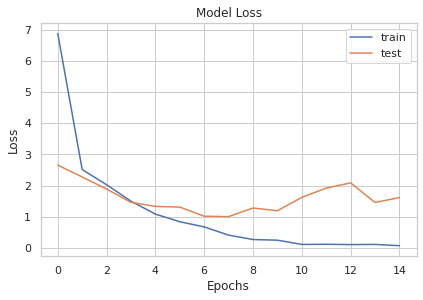

In [47]:
#Graficacion del Loss del modelo
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

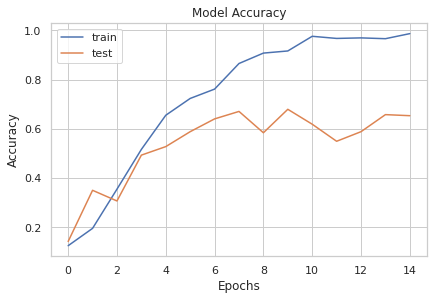

In [48]:
#Graficacion del Accuracy del modelo
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [49]:
#Accuracy y Loss del modelo
score_model1 = model.evaluate(x_test, y_test, verbose=0)
print('Test loss Model:', score_model1[0])
print('Test accuracy Model:', score_model1[1])

Test loss Model: 2.7193984985351562
Test accuracy Model: 0.043290045112371445


8/8 [==============================] - 5s 620ms/step


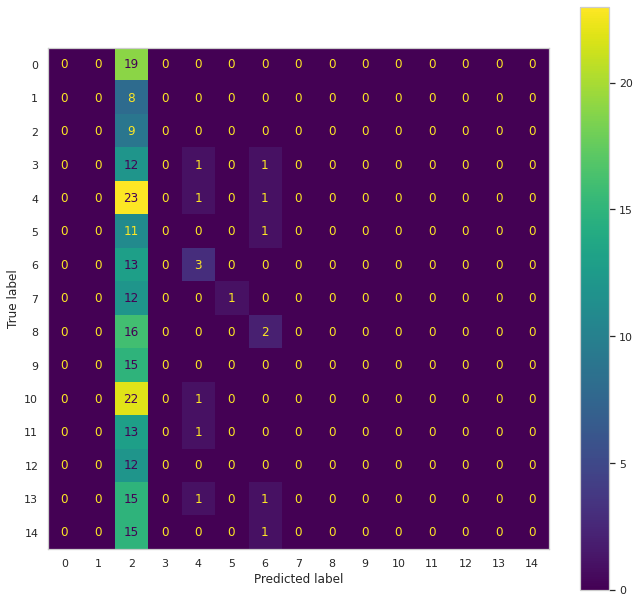

In [50]:
#matriz de confusion
fig, ax = plt.subplots(figsize=(10, 10))
plt.grid(None)
matrix = confusion_matrix(y_test.argmax(axis = 1), model.predict(x_test).argmax(axis=1))
ConfusionMatrixDisplay(matrix).plot(ax = ax)